## Cut-offs

If we plot the Lennard-Jones potential all the way out to 15 Å, it will look something like this.

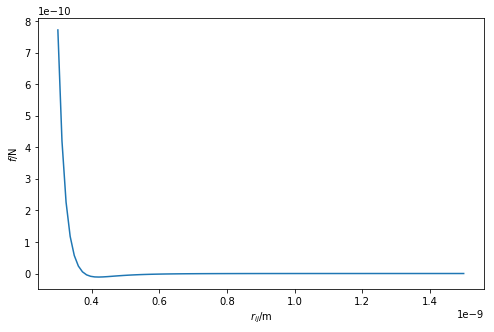

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def lj_force(rij, a, b):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    b: float 
        B parameter for interaction between i and j
    
    Returns
    -------
    float
        Force of the interaction between i and j.
    """
    return 12 * a / np.power(rij, 13) - 6 * b / np.power(rij, 7)

r = np.linspace(3e-10, 15e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, lj_force(r, 1.363e-134, 9.273e-78))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$f$/N')
plt.show()

It is clear that as the particles move further away from each other, the force between them **tends towards zero**. 
The concept of a cut-off suggests that if two particles are found to be very far apart, there is **no need** to calculate thh energy/force. 
Instead the value is simply taken as 0,

$$       f(r_{ij})=\left\{
  \begin{array}{@{}ll@{}}
    \dfrac{12A}{r_{ij}^{13}} - \dfrac{6B}{r_{ij}^7}, & \text{if}\ a<15\text{ Å} \\
    0, & \text{otherwise.}
  \end{array}\right.
$$

In addition to saving some computational cost, this provides a **more** realistic simulation. 
Furthermore, when there are periodic boundaries present (mentioned below), the cut-off ensures that the forces are not sampled incorrectly by having a cut-off of less than half of the cell size.  

This Python code below shows a modification of the Lennard-Jones potential that accounts for this cut-off.

In [2]:
cutoff = 15e-10

def lj_force_cutoff(rij, a, b):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction which 
    is considerate of the cut-off.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    b: float 
        B parameter for interaction between i and j
    
    Returns
    -------
    float
        Force of the interaction between i and j.
    """
    if rij < cutoff:
        return 12 * a / np.power(rij, 13) - 6 * b / np.power(rij, 7)
    else:
        return 0